#                Square Panda Game Activity Exploratory Analysis

In [1]:
import utils
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from sklearn import tree, model_selection

df = pd.read_csv("DataTest1..csv", error_bad_lines=False)



Bad key "patch.force_edgecolor" on line 33 in
/home/miti/.local/lib/python2.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution

Bad key "lines.dashed_pattern" on line 18 in
/home/miti/.local/lib/python2.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution

Bad key "boxplot.meanprops.markeredgecolor" on line 369 in
/home/miti/.local/lib/python2.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution

Bad key "date.autofor

### Cleaning the data: 
### 1) Filter the activities where the words played are not nonsense words.
### 2) Remove the activities which have Do Not Consider flag as 1

In [17]:
df.shape

(309625, 18)

In [2]:
df = df[df['nonsensewords']==0]

In [3]:
df = df[df['dnc']==0]

In [4]:
df.shape

(119189, 18)

### Note: We reduced the size of the data to half

## Let's calculate Age from the Date of Birth

### Age = (Current Year - Birth Year)
### Let's calculate Current Year and extract Birth Year from Dob 

In [5]:
now = dt.date.today().year

### Fill 'null' values with a placeholder to allow calculations 

In [6]:
df['dateofbirth'] = df.dateofbirth.replace('null','1/1/01 12:00 AM' )


In [7]:
df['duration'] = df['duration'].replace('null','0')
df['duration'] = df['duration'].astype(int)



In [8]:
df['gender'] = df.gender.replace('O','Not Known')
df['gender'] = df.gender.replace('null','Not Known')

### Convert dob to DateTime datatype to extract year from it

In [9]:
df['dateofbirth'] = pd.to_datetime(df['dateofbirth'] ,format='%m/%d/%y %H:%M AM',errors='coerce')

In [10]:
df['year']=df['dateofbirth'].dt.year

In [11]:
df['age'] = now - df['year']
df['age'].head()

65541     9
65543     4
65545     5
65546    13
65550     6
Name: age, dtype: int64

### Remove age anamolies from data

In [12]:
df = df[df['age']>=0]
df.shape

(118275, 20)

# Grouping by various fields 

In [29]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
matplotlib.style.use('ggplot')
df1 = df[df['createdat']
df1.cumsum().plot(x='createdat',y='age')

plt.show()

SyntaxError: invalid syntax (<ipython-input-29-df88c1694e53>, line 6)

In [16]:
df['createdat']=pd.to_datetime(df['createdat'])

In [17]:
df['createdat'].describe

<bound method Series.describe of 65541    2016-12-15 15:42:00
65543    2016-12-20 13:23:00
65545    2016-12-28 02:31:00
65546    2016-12-08 15:05:00
65550    2016-12-17 00:45:00
65551    2016-12-28 20:32:00
65552    2016-12-26 15:01:00
65554    2016-12-26 18:01:00
65556    2017-02-23 12:38:00
65557    2017-02-23 14:48:00
65559    2017-03-28 15:48:00
65561    2017-02-17 02:35:00
65563    2017-03-16 15:26:00
65565    2017-03-16 17:36:00
65566    2017-03-28 16:24:00
65567    2017-03-28 17:45:00
65568    2017-03-28 19:14:00
65569    2017-03-28 23:42:00
65570    2017-03-29 13:22:00
65571    2017-03-29 15:31:00
65572    2017-03-29 17:21:00
65573    2017-03-29 19:43:00
65574    2017-03-29 20:46:00
65575    2017-03-30 00:26:00
65576    2017-03-30 12:27:00
65577    2017-02-27 02:23:00
65579    2017-03-08 16:00:00
65583    2017-01-09 21:52:00
65586    2017-03-08 20:40:00
65587    2017-03-09 00:57:00
                 ...        
309522   2016-12-29 14:52:00
309526   2017-01-13 12:55:00
309540   2

## Let's see the distribution of activities by Games

/home/miti/.local/lib/python2.7/site-packages/pandas/plotting/_core.py:179: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


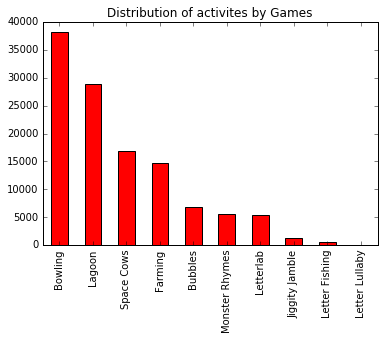

In [18]:
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','red','green','blue','orange','white','brown']
df['gamename'].value_counts().plot(kind='bar',stacked=True, title='Distribution of activites by Games',colors=['red'])
plt.show()

### This shows us that the maximum played game is   Bowling > Lagoon >  Space Cows> Farming 

## Distribution of activities per Age

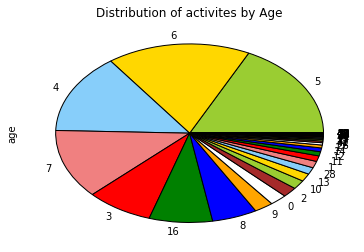

In [19]:
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','red','green','blue','orange','white','brown']
df['age'].value_counts().plot(kind='pie',title='Distribution of activites by Age',colors=colors)
plt.show()

### This shows that 50% of the age range of our players belong to is 4-6

## Distribution of type of Word (Word/Letter)

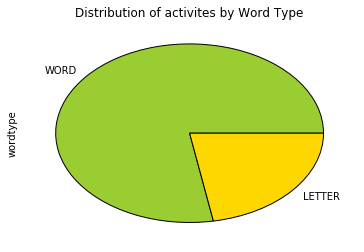

In [20]:
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','red','green','blue','orange','white','brown']
df['wordtype'].value_counts().plot(kind='pie',title='Distribution of activites by Word Type',colors=colors)
plt.show()

### This show that approximately more than 75% of activities played are for the wordtype as 'Word' and 25% as 'Letter'

## Distribution of Activities by Gender

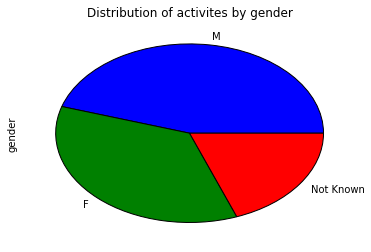

In [21]:
df['gender'].value_counts().plot(kind='pie',title='Distribution of activites by gender')
plt.show()

## Let's calculate average duration i.e. time for which each activity is carried out

In [22]:
Average_seconds = df['duration'].mean()
Avergae_minutes = df['duration'].mean()/60
print('Average Duration in seconds is:',Average_seconds)
print('Average Duration in minutes is:',Avergae_minutes)

('Average Duration in seconds is:', 556.61003593320652)
('Average Duration in minutes is:', 9.276833932220109)


### Hence the Average duration of each activity is 9.3827 minutes or 562.9675 seconds

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118275 entries, 65541 to 309621
Data columns (total 20 columns):
id               118275 non-null object
childid          118275 non-null float64
endtime          118275 non-null object
gamename         118275 non-null object
gamescore        118275 non-null object
nonsensewords    118275 non-null int64
starttime        118275 non-null object
userid           118275 non-null float64
word             118266 non-null object
wordtype         118275 non-null object
createdat        118275 non-null datetime64[ns]
end_ms_time      118275 non-null object
start_ms_time    118275 non-null object
platform         118275 non-null object
dnc              118275 non-null object
gender           118275 non-null object
dateofbirth      118275 non-null datetime64[ns]
duration         118275 non-null int64
year             118275 non-null int64
age              118275 non-null int64
dtypes: datetime64[ns](2), float64(2), int64(4), object(12)
memory usag

In [24]:
df['platform'] = df['platform'].replace('null','Not Known')

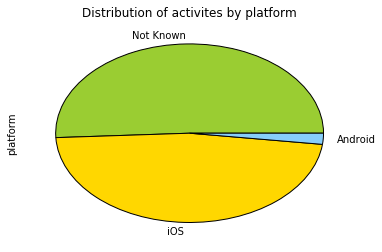

In [25]:
df['platform'].value_counts().plot(kind='pie',title='Distribution of activites by platform',colors=colors)
plt.show()

### Hence we know maximum of our traffic is through iOS apps or is not known. Android Play Store is where we have a large scope to increase our customer base

In [26]:
df['gamescore'] = df['gamescore'].replace('null','0')

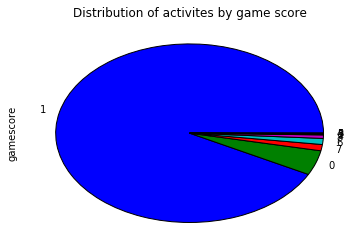

In [27]:
df['gamescore'].value_counts().plot(kind='pie',title='Distribution of activites by game score')
plt.show()

In [28]:
df['createdat'] = pd.to_datetime(df['createdat'])

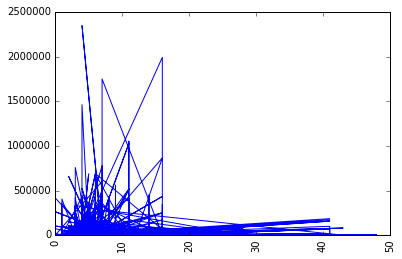

In [29]:
df = df.sort_values('createdat', ascending=True)
plt.plot(df['age'], df['duration'])
plt.xticks(rotation='vertical')
plt.show()

## Sum of total duration of children with different ages depicts that maximum duration if for the children of age 5-15

### Hence no data before 2016

In [ ]:
df['2016']

In [ ]:
df['2017']

### Hence we now know our maximum activity traffic is from the year 2017

In [ ]:
s = pd.Series(df['createdat'], name='squares')
s

In [ ]:
s.values

In [ ]:
s.index

## Total activities per Game

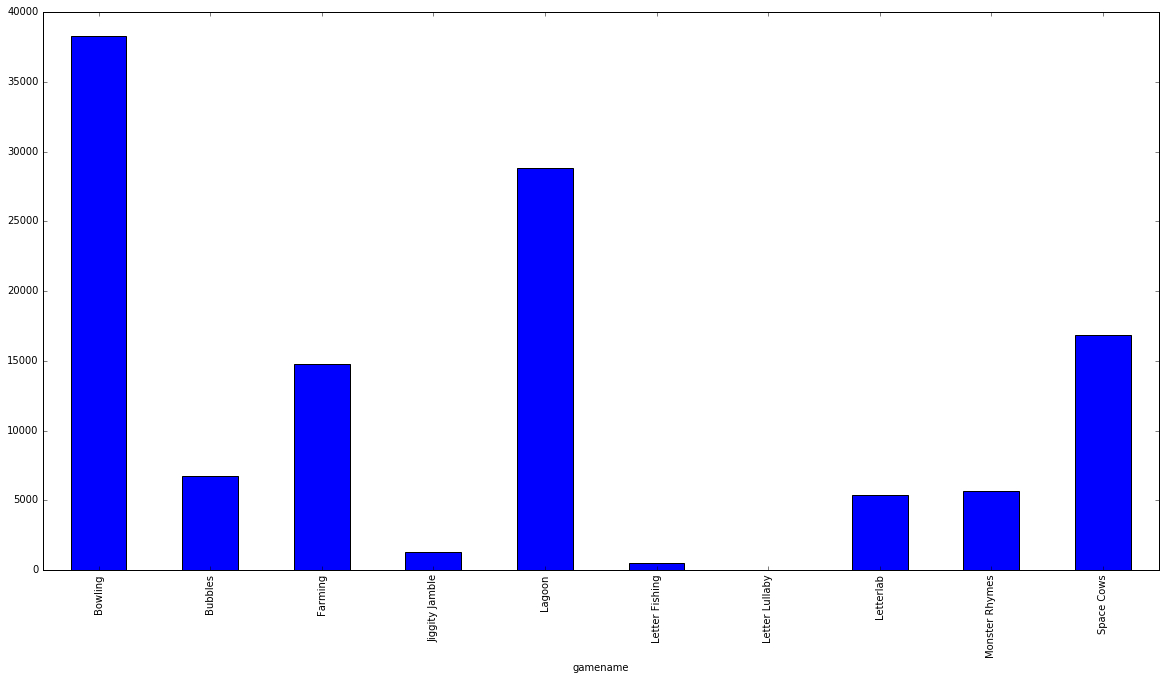

In [30]:
df.groupby(['gamename']).size().plot(kind='bar', figsize=(20,10))
plt.show()

## Total Activities by Age

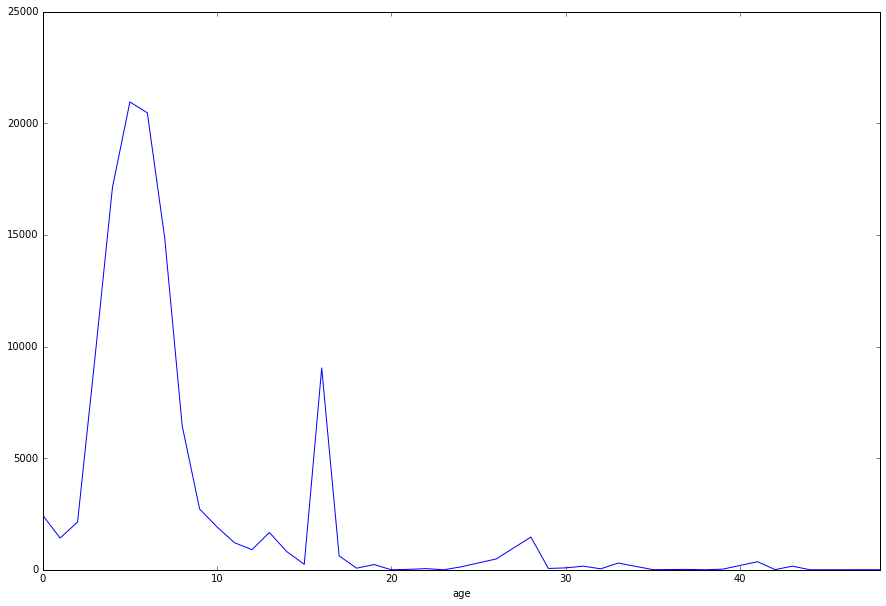

In [31]:
df.groupby(['age']).size().plot(kind='line',figsize=(15,10))
plt.show()

## Plots of duration for every child on the first day v/s last day

### To find if the engagement of a child increased with time

In [32]:
df_first = df.groupby(['childid'])['createdat','duration'].first()
df_last = df.groupby(['childid'])['createdat','duration'].last()

#DF = pd.concat([df_first,df_last],keys=['childid','childid'])
#DFGroup = DF.groupby(['childid','duration'])

import matplotlib.pyplot as plt

#fil = pd.read_csv('imei.csv', sep=r'\s*', engine='python')
fig, ax = plt.subplots(figsize=(18,6))

for createdat, duration in df.groupby('childid'):
    group.plot(x=pd.to_datetime(group['createdat']), y='duration', ax=ax, label=name)

plt.show()#df_first.plot(kind='line')
#df_last.plot(kind='line')
plt.show()

NameError: name 'group' is not defined

## Saving the clean anamolies free data to csv

In [33]:
df.to_csv('SquarePanda_DataQuest.csv', sep=',', encoding='utf-8')

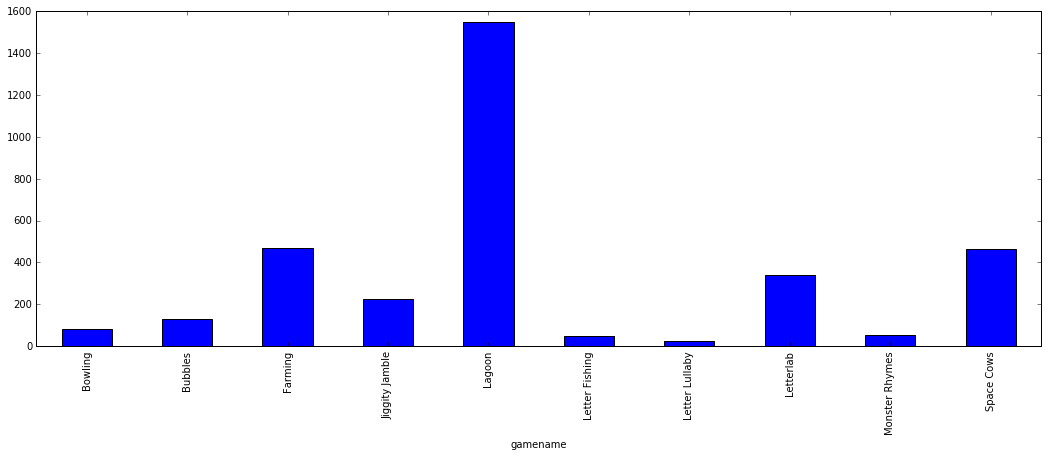

In [34]:
import numpy as np
grouped = df.groupby(df['gamename'])
grouped['duration'].agg(np.mean).plot(kind='bar')
plt.show()

In [35]:
import numpy as np
grouped = df.groupby(df['age'])
grouped['duration'].agg(np.mean).plot(kind='line', figsize=(20,10), ylabel=)
plt.show()

SyntaxError: invalid syntax (<ipython-input-35-a22d57ef1528>, line 3)

In [36]:
df_createdate = df.groupby(['childid'])['createdat'].first()
df_createdat = pd.to_datetime(df_createdate)
df_createdat

childid
183.0    2016-11-10 14:46:00
188.0    2016-09-14 23:52:00
189.0    2016-07-15 21:08:00
191.0    2016-09-15 15:39:00
193.0    2016-08-02 16:47:00
194.0    2016-08-09 19:05:00
196.0    2016-07-16 03:07:00
197.0    2016-07-16 04:12:00
198.0    2016-07-17 00:08:00
199.0    2016-11-06 23:36:00
200.0    2016-07-20 14:54:00
202.0    2016-07-25 21:55:00
203.0    2016-10-04 15:34:00
204.0    2016-07-17 00:31:00
205.0    2016-07-18 23:49:00
206.0    2016-09-26 23:44:00
211.0    2016-08-05 02:04:00
214.0    2016-09-16 17:27:00
215.0    2016-11-12 16:07:00
218.0    2016-08-20 23:38:00
219.0    2016-07-18 00:59:00
220.0    2016-11-13 17:24:00
229.0    2016-07-18 23:18:00
230.0    2016-07-26 14:28:00
232.0    2016-07-21 01:19:00
233.0    2016-09-23 23:45:00
234.0    2016-07-22 03:01:00
237.0    2016-07-22 22:19:00
238.0    2016-08-08 18:29:00
246.0    2016-08-17 15:08:00
                 ...        
3914.0   2017-07-10 20:22:00
3915.0   2017-07-11 00:47:00
3916.0   2017-07-10 20:13:00
3917.0